In [1]:
import glob
import pandas as pd
import numpy as np
import torch
from torchvision.transforms import ToPILImage
from IPython.display import display
import os



In [2]:
# Pasta contendo os arquivos .npy
folder_path_1300 = 'E:/Dario_depth/depth/1300s/depth_cropped'

folder_path_1400 = 'E:/Dario_depth/depth/1400s_new/depth/val/images'

folder_path_1500 = 'E:/Dario_depth/depth/1500s_new/depth/val/images'

# Obter a lista de caminhos dos arquivos .npy usando glob
file_paths_1300 = glob.glob(folder_path_1300 + '/*.npy')

# Obter a lista de caminhos dos arquivos .npy usando glob
file_paths_1400 = glob.glob(folder_path_1400 + '/*.npy')

# Obter a lista de caminhos dos arquivos .npy usando glob
file_paths_1500 = glob.glob(folder_path_1500 + '/*.npy')

# Criar uma lista para armazenar os tensores
tensors = []


## Antigo

In [3]:

def npy_to_tensor(file_path):
            
    # Carregar o arquivo .npy como array NumPy
    numpy_array = np.load(file_path)
    numpy_array = numpy_array.astype(np.float32)
    
    # Converter o array NumPy em um tensor PyTorch
    tensor = torch.from_numpy(numpy_array)

    return tensor


def load_images(directory,
                limite_id = np.inf):

    # Dicionário para armazenar as imagens por calf_id
    image_tensors_dict = {}

    # Percorrer cada arquivo de imagem no diretório
    for file_path in sorted(glob.glob(directory + '/*.npy')):
        # Extrair o calf_id do nome do arquivo
        calf_id = file_path.split('_')[4]

        if int(calf_id) < limite_id:    

            # Verificar se o calf_id já existe no dicionário
            if calf_id in image_tensors_dict:

                tensor = npy_to_tensor(file_path)
                # Adicionar o tensor à lista correspondente ao calf_id
                image_tensors_dict[calf_id].append(tensor)
            else:
                # Criar uma nova lista de tensores para o calf_id
                tensor = npy_to_tensor(file_path)
                calfs_id.append(calf_id)
                image_tensors_dict[calf_id] = [tensor]

    # Criar um dicionário final com tensores 3D para cada calf_id
    final_image_tensors_dict = {}

    for calf_id, tensor_list in image_tensors_dict.items():
        # Empilhar os tensores ao longo da dimensão temporal
        time_tensor = torch.stack(tensor_list)
        
        # Adicionar o tensor ao dicionário final
        final_image_tensors_dict[calf_id] = time_tensor

    return final_image_tensors_dict

## Novo

In [4]:

def npy_to_tensor(file_path):
    # Carregar o arquivo .npy como array NumPy
    numpy_array = np.load(file_path)
    numpy_array = numpy_array.astype(np.float32)
    
    # Converter o array NumPy em um tensor PyTorch
    tensor = torch.from_numpy(numpy_array)

    return tensor

def load_images(directory, limite_id=np.inf):
    # Gerador para produzir os tensores sob demanda
    def tensor_generator():
        # Percorrer cada arquivo de imagem no diretório
        for file_path in sorted(glob.glob(directory + '/*.npy')):
            # Extrair o calf_id do nome do arquivo
            calf_id = file_path.split('_')[4]

            if int(calf_id) >= limite_id:
                continue

            # Carregar o tensor correspondente ao arquivo .npy
            tensor = npy_to_tensor(file_path)

            yield calf_id, tensor

    # Dicionário para armazenar as imagens por calf_id
    image_tensors_dict = {}

    # Iterar sobre os tensores gerados
    for calf_id, tensor in tensor_generator():
        # Verificar se o calf_id já existe no dicionário
        if calf_id in image_tensors_dict:
            # Adicionar o novo tensor à lista correspondente ao calf_id
            image_tensors_dict[calf_id].append(tensor)
        else:
            # Criar uma nova lista de tensores para o calf_id
            image_tensors_dict[calf_id] = [tensor]

    return image_tensors_dict



# 1300

In [5]:
images_1300 = load_images(folder_path_1300)

In [6]:
def display_image(tensor):
    # Convert tensor to PIL image
    to_pil = ToPILImage()
    image = to_pil(tensor)
    display(image)

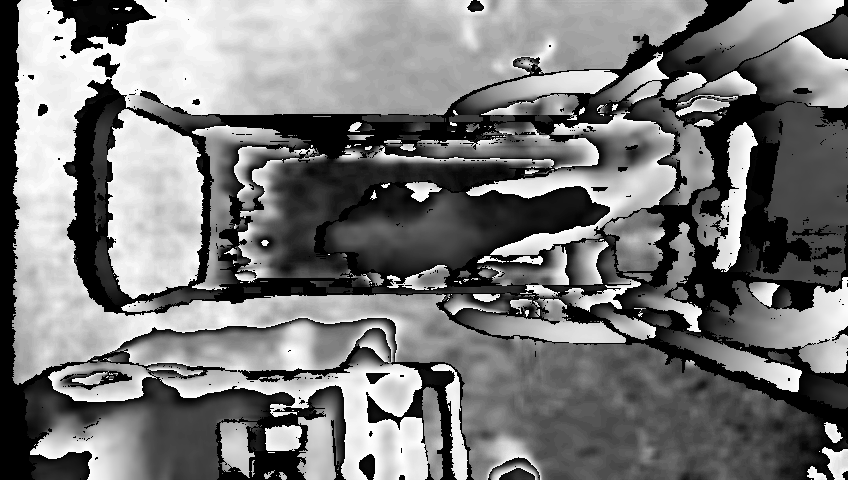

In [7]:
display_image(images_1300['1387'][0])

In [1]:
images_1300['1387'][0]

NameError: name 'images_1300' is not defined

# 1400

In [8]:
images_1400 = load_images(folder_path_1400,
                          limite_id  = 1430) 

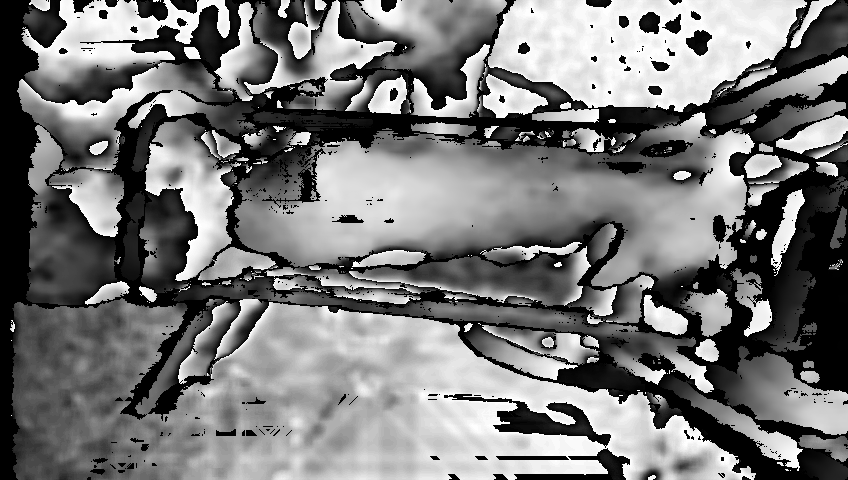

In [9]:
display_image(images_1400['1400'][1])

# 1500

In [10]:
images_1500 = load_images(folder_path_1500,
                          limite_id  = 1530) 

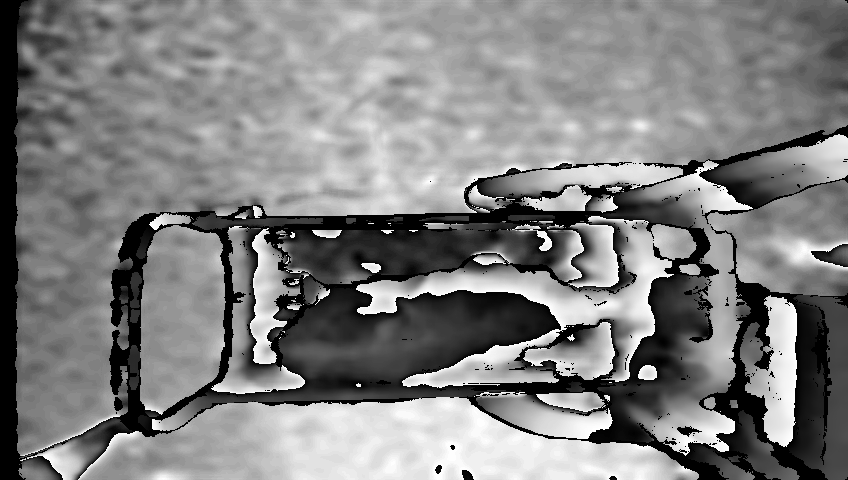

In [15]:
display_image(images_1500['1510'][120])

In [12]:

def get_image_ids(file_paths):

    image_ids = []


    for file_path in file_paths:
        image_id = file_path.split('\\')[-1]

        image_id = image_id.split('.')[0]

        image_ids.append(image_id)

    return image_ids


def create_df_from_image_ids(image_ids, type):

    file_names = pd.DataFrame(image_ids, columns=['image_id'])

    file_names['npy_image']    = file_names['image_id']+ '.npy'

    file_names['binary_image'] = file_names['image_id']+ '_pmask.png'

    file_names['splash_image'] = 'splash_' + file_names['image_id'] + '.png'

    file_names['type'] = type

    return file_names



def create_file_names_df(file_paths, type):

    image_ids = get_image_ids(file_paths)

    df = create_df_from_image_ids(image_ids,
                                  type = type)
    

    return df



In [13]:
file_names = create_file_names_df(file_paths_1300, 1300)

file_names = pd.concat([file_names, create_file_names_df(file_paths_1400, 1400)], ignore_index=True)

file_names = pd.concat([file_names, create_file_names_df(file_paths_1500, 1500)], ignore_index=True)



In [14]:
file_names

,image_id,npy_image,binary_image,splash_image,type
0,calf_id_1387_20210621_743_depth_0042,calf_id_1387_20210621_743_depth_0042.npy,calf_id_1387_20210621_743_depth_0042_pmask.png,splash_calf_id_1387_20210621_743_depth_0042.png,1300
1,calf_id_1387_20210621_743_depth_0057,calf_id_1387_20210621_743_depth_0057.npy,calf_id_1387_20210621_743_depth_0057_pmask.png,splash_calf_id_1387_20210621_743_depth_0057.png,1300
2,calf_id_1387_20210621_743_depth_0059,calf_id_1387_20210621_743_depth_0059.npy,calf_id_1387_20210621_743_depth_0059_pmask.png,splash_calf_id_1387_20210621_743_depth_0059.png,1300
3,calf_id_1387_20210621_743_depth_0061,calf_id_1387_20210621_743_depth_0061.npy,calf_id_1387_20210621_743_depth_0061_pmask.png,splash_calf_id_1387_20210621_743_depth_0061.png,1300
4,calf_id_1387_20210621_743_depth_0064,calf_id_1387_20210621_743_depth_0064.npy,calf_id_1387_20210621_743_depth_0064_pmask.png,splash_calf_id_1387_20210621_743_depth_0064.png,1300
...,...,...,...,...,...
70679,calf_id_1599_20220207_408_depth_0353,calf_id_1599_20220207_408_depth_0353.npy,calf_id_1599_20220207_408_depth_0353_pmask.png,splash_calf_id_1599_20220207_408_depth_0353.png,1500
70680,calf_id_1599_20220207_408_depth_0361,calf_id_1599_20220207_408_depth_0361.npy,calf_id_1599_20220207_408_depth_0361_pmask.png,splash_calf_id_1599_20220207_408_depth_0361.png,1500
70681,calf_id_1599_20220207_408_depth_0383,calf_id_1599_20220207_408_depth_0383.npy,calf_id_1599_20220207_408_depth_0383_pmask.png,splash_calf_id_1599_20220207_408_depth_0383.png,1500
70682,calf_id_1599_20220207_408_depth_0390,calf_id_1599_20220207_408_depth_0390.npy,calf_id_1599_20220207_408_depth_0390_pmask.png,splash_calf_id_1599_20220207_408_depth_0390.png,1500
